In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
ticker = 'AAPL'
df = yf.Ticker(ticker).history(period='max')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100600,0.101037,0.100600,0.100600,469033600,0.0,0.0
1980-12-15,0.095789,0.095789,0.095352,0.095352,175884800,0.0,0.0
1980-12-16,0.088790,0.088790,0.088353,0.088353,105728000,0.0,0.0
1980-12-17,0.090540,0.090977,0.090540,0.090540,86441600,0.0,0.0
1980-12-18,0.093165,0.093602,0.093165,0.093165,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2021-10-04,141.759995,142.210007,138.270004,139.139999,98322000,0.0,0.0
2021-10-05,139.490005,142.240005,139.360001,141.110001,80861100,0.0,0.0
2021-10-06,139.470001,142.149994,138.369995,142.000000,83221100,0.0,0.0


In [3]:
df[ticker] = df.Close.pct_change()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,AAPL
Date,,,,,,,,
1980-12-12,0.100600,0.101037,0.100600,0.100600,469033600,0.0,0.0,NaN
1980-12-15,0.095789,0.095789,0.095352,0.095352,175884800,0.0,0.0,-0.052171
1980-12-16,0.088790,0.088790,0.088353,0.088353,105728000,0.0,0.0,-0.073398
1980-12-17,0.090540,0.090977,0.090540,0.090540,86441600,0.0,0.0,0.024751
1980-12-18,0.093165,0.093602,0.093165,0.093165,73449600,0.0,0.0,0.028992
...,...,...,...,...,...,...,...,...
2021-10-04,141.759995,142.210007,138.270004,139.139999,98322000,0.0,0.0,-0.024606
2021-10-05,139.490005,142.240005,139.360001,141.110001,80861100,0.0,0.0,0.014158
2021-10-06,139.470001,142.149994,138.369995,142.000000,83221100,0.0,0.0,0.006307


In [7]:
df[['Open','Close','AAPL']]

,Open,Close,AAPL
Date,,,
1980-12-12,0.100600,0.100600,NaN
1980-12-15,0.095789,0.095352,-0.052171
1980-12-16,0.088790,0.088353,-0.073398
1980-12-17,0.090540,0.090540,0.024751
1980-12-18,0.093165,0.093165,0.028992
...,...,...,...
2021-10-04,141.759995,139.139999,-0.024606
2021-10-05,139.490005,141.110001,0.014158
2021-10-06,139.470001,142.000000,0.006307


In [11]:
df[['Open','Close','AAPL']].iloc[2:4,0:2]

,Open,Close
Date,,
1980-12-16,0.08879,0.088353
1980-12-17,0.09054,0.090540


In [12]:
df[['Open','Close','AAPL']].loc['1980-12-16':'1980-12-17','Open':'Close']

,Open,Close
Date,,
1980-12-16,0.08879,0.088353
1980-12-17,0.09054,0.090540


In [10]:
df['AAPL'].shape

(10294,)

In [15]:
def give_me_df(ticker):
    """
    주어진 티커의 일일수익률을 데이타프레임 형태로 리턴한다.
    
    Input : str : ticker
    Output : pd.DataFrame : daily return of stock (given by ticker) close 
    """
    df = yf.Ticker(ticker).history(period='max')
    df[ticker] = df.Close.pct_change()
    return df[[ticker]].iloc[1:] 

In [16]:
ticker  = 'AAPL'
df = give_me_df(ticker)
df

,AAPL
Date,
1980-12-15,-0.052171
1980-12-16,-0.073398
1980-12-17,0.024751
1980-12-18,0.028992
1980-12-19,0.061029
...,...
2021-10-04,-0.024606
2021-10-05,0.014158
2021-10-06,0.006307


In [17]:
FB = give_me_df('FB')
FB

,FB
Date,
2012-05-21,-0.109861
2012-05-22,-0.089039
2012-05-23,0.032258
2012-05-24,0.032187
2012-05-25,-0.033909
...,...
2021-10-04,-0.048920
2021-10-05,0.020630
2021-10-06,0.002042


In [18]:
SPY = give_me_df('SPY')
SPY

,SPY
Date,
1993-02-01,0.007112
1993-02-02,0.002119
1993-02-03,0.010570
1993-02-04,0.004184
1993-02-05,-0.000694
...,...
2021-10-04,-0.012896
2021-10-05,0.010405
2021-10-06,0.004156


In [23]:
df = FB.join(SPY, how='inner')
df

,FB,SPY
Date,,
2012-05-21,-0.109861,0.017188
2012-05-22,-0.089039,0.001743
2012-05-23,0.032258,0.000529
2012-05-24,0.032187,0.001966
2012-05-25,-0.033909,-0.003245
...,...,...
2021-10-04,-0.048920,-0.012896
2021-10-05,0.020630,0.010405
2021-10-06,0.002042,0.004156


In [24]:
x_train = df.SPY[-200:-100].values.reshape((-1,1)) # (100,) ---> (100,1) 
y_train = df.FB[-200:-100].values # (100,)
x_test = df.SPY[-100:].values.reshape((-1,1)) # (100,) ---> (100,1)  
y_test = df.FB[-100:].values # (100,)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 1) (100,)
(100, 1) (100,)


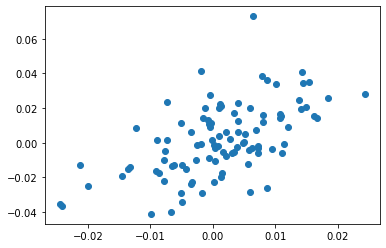

In [25]:
plt.plot(x_train.reshape((-1,)), y_train, 'o');

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression() # 리니너 리그레션 오브젝트(인스탄스) 생성 
model.fit(x_train, y_train) # 모델 트레인
print('직선의 기울기 : ', model.coef_) # beta
print('y 절편      : ', model.intercept_) # alpha

직선의 기울기 :  [1.30874987]
y 절편      :  9.58106742281336e-05


In [29]:
y_train_pred = model.predict(x_train) 
y_test_pred = model.predict(x_test) 

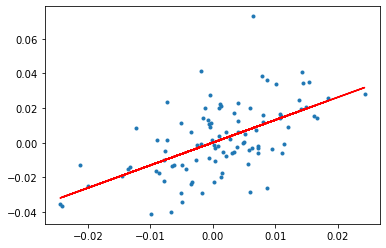

In [30]:
plt.plot(x_train.reshape((-1,)), y_train, '.');
plt.plot(x_train.reshape((-1,)), y_train_pred, '-r');

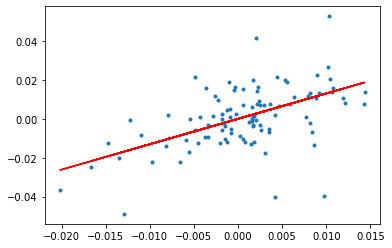

In [31]:
plt.plot(x_test.reshape((-1,)), y_test, '.');
plt.plot(x_test.reshape((-1,)), y_test_pred, '-r');

In [32]:
model2 = LinearRegression() # 리니너 리그레션 오브젝트(인스탄스) 생성 
model2.fit(x_test, y_test) # 모델 트레인
print('직선의 기울기 : ', model2.coef_) # beta
print('y 절편      : ', model2.intercept_) # alpha

직선의 기울기 :  [1.20778303]
y 절편      :  -9.058741900942291e-05
